###################################################<br>
title: NFL QB Predictor<br>
author: Kevin Huang<br>
date: 20170519(original date), Edits made 20180720<br>
output: Datasets used for Analysis - 6 Total Datasets<br>
Notes: Preprocessing: Exploratory Data Analysis<br>
python version: 3.6.5: Anaconda 4.3.1<br>
###################################################<br>


#### Import libraries & load dataset

In [85]:
import pandas as pd
import numpy as np
import os, sys

In [98]:
# Creating variables for the path of file
file_path = '/Users/kevin8523/Desktop/Github/nfldraft_qb_study/data_created'

# Set working directory 
os.chdir(file_path)
os.getcwd()

# Read in Data
df = pd.read_csv('Dataset_All.csv', header=0)

#### Quick sanity check of the data

In [102]:
# Shape of the data
print('\033[1m'+'DATASET','(ROWS, COLUMNS)'+'\033[0m')
print('df',df.shape)

DATASET (ROWS, COLUMNS)
df (1188, 37)


In [103]:
# df.head(), df.tail(),df.info(),df.describe()
df.head(2)

,Unnamed: 0,X.Rk.x,Player,School.x,Conf,G,Cmp,Att,Pct,Yds,...,BenchReps,Broad.Jump,X3Cone,Shuttle,Drafted..tm.rnd.yr..,Score,Position,Pro_bowl,TD_INT_Ratio,dupe
205,206,22,Peyton Manning,Tennessee,SEC,12,287,477,60.2,3819,...,NaN,NaN,NaN,NaN,NaN,19.0,QB,Yes,0.765957,Peyton ManningTennessee


#### Scrub data for exploratory data analysis


In [101]:
# Take the latest year for multiple years playing
df['dupe'] = df.Player+df['School.x'] # Create duplicate column
df = df.drop_duplicates('dupe', keep='last')
# Check to ensure no duplication
df[df.Player == 'Peyton Manning'].head(5)


,Unnamed: 0,X.Rk.x,Player,School.x,Conf,G,Cmp,Att,Pct,Yds,...,BenchReps,Broad.Jump,X3Cone,Shuttle,Drafted..tm.rnd.yr..,Score,Position,Pro_bowl,TD_INT_Ratio,dupe
205,206,22,Peyton Manning,Tennessee,SEC,12,287,477,60.2,3819,...,NaN,NaN,NaN,NaN,NaN,19.0,QB,Yes,0.765957,Peyton ManningTennessee


#### Exploratory Data Analysis

In [6]:
# Visualize data for exploration 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visualize Data 
# import plotly.plotly as py
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [168]:
# Select a list of columns to visualize
# Reorder columns
list(df.columns.values)
df_viz = df[['Player',
 'School.x',
 'Conf',
 'G',
 'Cmp',
 'Att',
 'Pct',
 'Yds',
 'Y.A',
 'AY.A',
 'TD',
 'Int',
 'Rate',
 'Att.1',
 'Yds.1',
 'Avg',
 'Rushing_TD',
 'Year.x',
 'Year.y',
 'Height',
 'Wt',
 'Pro_bowl',
 'TD_INT_Ratio']]

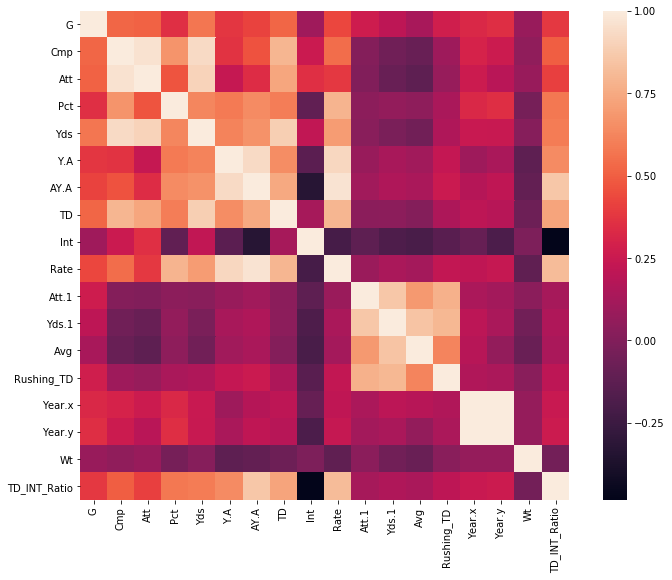

In [33]:
# Correlation matrix 
# seaborn
corrmat = df_viz.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)

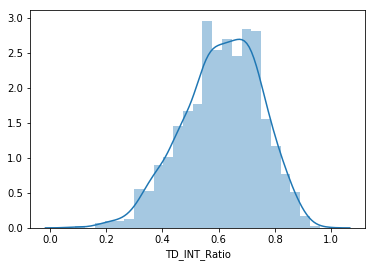

In [208]:
# Distrbution of Qb TDs
# seaborn
sns.distplot(df_viz.TD_INT_Ratio)

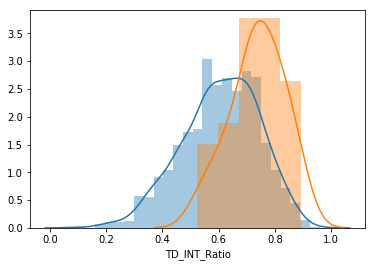

In [198]:
# Distrbution of Probowl and Non Probowl Qb Accuracy
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.TD_INT_Ratio)
sns.distplot(df_pb.TD_INT_Ratio)

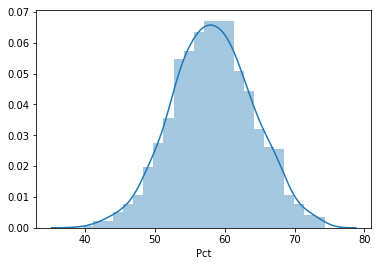

In [188]:
# Distrbution of Qb Accuracy
# seaborn
sns.distplot(df_viz.Pct)

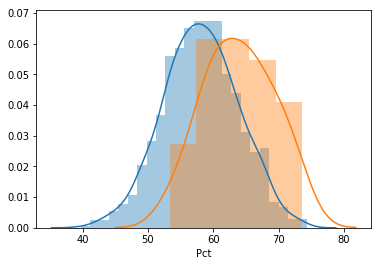

In [189]:
# Distrbution of Probowl and Non Probowl Qb Accuracy
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.Pct)
sns.distplot(df_pb.Pct)

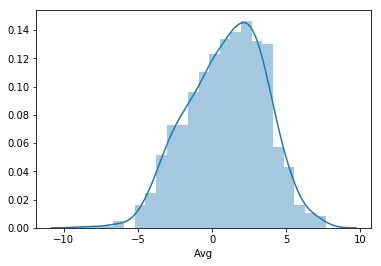

In [211]:
# Distrbution of sacked YPC Running
# seaborn
sns.distplot(df_viz.Avg)

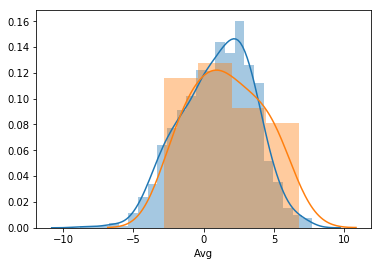

In [209]:
# Distrbution of Probowl and Non Probowl YPC Running 
# Tells you if they get sacked alot. In college for some reason sacks counts for ypc
# seaborn
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl == 'No']
sns.distplot(df_nopb.Avg)
sns.distplot(df_pb.Avg)

In [138]:
# Scatter plot of Accuracy & TD for QBs
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_nopb = df_viz[df_viz.Pro_bowl != 'Yes']

# creating trace1
trace1 = go.Scatter(
                    x = df_pb.Pct,
                    y = df_pb.TD,
                    mode = "markers",
                    name = "Probowl QB",
                    marker = dict(color = 'Green'),
                    text= df_pb.Player)
# creating trace2
trace2 = go.Scatter(
                    x = df_nopb.Pct,
                    y = df_nopb.TD,
                    mode = "markers",
                    name = "Non Probowl QB",
                    marker = dict(color = 'Yellow'),
                    text= df_nopb.Player)
# Layers of visual
data = [trace2, trace1]
# Layout
layout = dict(title = 'Accuracy & TD of Probowl vs Non Probowl QBs',
              xaxis= dict(title= 'Accuracy %',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TD',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig) #iplot for inline / plot for new html

In [155]:
# Number of Probowl QB by Conference
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_pb = df_pb.groupby(['Conf']).size().reset_index(name='counts').sort_values('counts',ascending = False)

df_nopb = df_viz[df_viz.Pro_bowl != 'Yes']
df_nopb = df_nopb.groupby(['Conf']).size().reset_index(name='counts').sort_values('counts',ascending = False)

# Creating trace1
trace1 = go.Bar(
                x = df_pb.Conf,
                y = df_pb.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)

# Create trace2
trace2 = go.Bar(
                x = df_nopb.Conf,
                y = df_nopb.counts,
                name = "Count of Non-Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)

# Layers of visual
data = [trace1,trace2]

# Layout
layout = go.Layout(
                   title = 'Probowlers By Conf',
                   barmode = 'stack',
                   yaxis = dict(title = 'Count by Conference')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

In [185]:
# Number of Probowl QB by Year
# Plotly
df_pb = df_viz[df_viz.Pro_bowl == 'Yes']
df_pb = df_pb.groupby(['Year.x']).size().reset_index(name='counts')

# Creating trace1
trace1 = go.Bar(
                x = df_pb['Year.x'],
                y = df_pb.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)


# Layers of visual
data = [trace1]

# Layout
layout = go.Layout(
                   title = 'Probowlers by Year',
                   xaxis = dict(tickmode = 'linear',tickangle=90),
                   yaxis = dict(title = 'Count by Year')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html

In [207]:
# Number of Probowl QB by Height
# Plotly

df_phys = df_viz[['Player',
 'School.x',
 'Height',
 'Wt',
 'Pro_bowl',]]

df_phys = df_viz[df_viz.Pro_bowl == 'Yes']
df_phys = df_phys.groupby(['Height']).size().reset_index(name='counts')

# Creating trace1
trace1 = go.Bar(
                x = df_phys['Height'],
                y = df_phys.counts,
                name = "Count of Probowl", # legend
                # marker = dict(color = 'rgba(16, 112, 2, 0.8)'), # color
)


# Layers of visual
data = [trace1]

# Layout
layout = go.Layout(
                   title = 'Probowlers by Height',
                   xaxis = dict(tickmode = 'linear'),
                   yaxis = dict(title = 'Count by Year')
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig) #iplot for inline / plot for new html